In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import classification_report, accuracy_score, r2_score


warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

#######kagle reivew ##################

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
print(f"Number of duplicates: {df.duplicated().sum()}")
# 중복행 check --> 0 

Number of duplicates: 0


In [ ]:
print("Missing values") 
df.isna().sum() 

Missing values


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# 고유값 check
df['Booking_ID'].unique() 

array(['INN00001', 'INN00002', 'INN00003', ..., 'INN36273', 'INN36274',
       'INN36275'], dtype=object)

In [ ]:
df = df.drop(columns=['Booking_ID'])

In [ ]:
df['type_of_meal_plan'].unique() 

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
label_encoder = LabelEncoder() 

df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan']) 
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved']) 
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type']) 
df['booking_status'] = label_encoder.fit_transform(df['market_segment_type']) 

# label_encoder 객체 생성 --> 바꿀 변수 안에 객체를 생성해야 숫자형으로 바꿔야 하기 떄문 
# fit transform: object-> int 


In [ ]:
df.dtypes
# change int check 

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

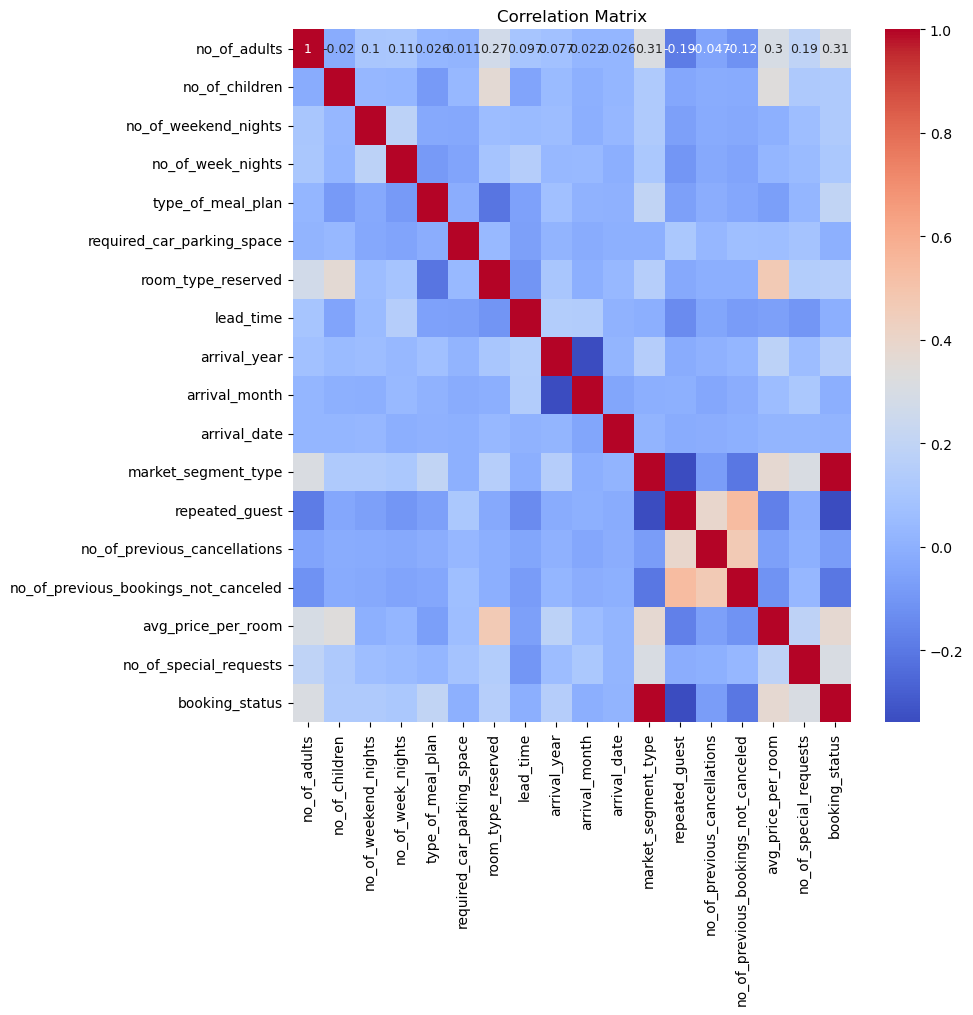

In [ ]:
# 상관관계 review
plt.figure(figsize=(9, 9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":9} )
plt.title('Correlation Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

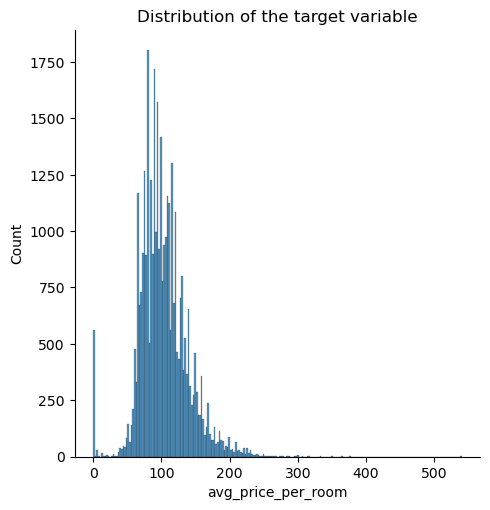

In [ ]:
# 대상 특성 분포
plt.figure(figsize=(8,6))
sns.displot(x='avg_price_per_room', data=df) 
plt.title('Distribution of the target variable')
plt.show() 
# 객실 당 평균 
# 객실에 평균 가격은 100(단위?)에서 높음, 횟수도 가장 높게 나타남 

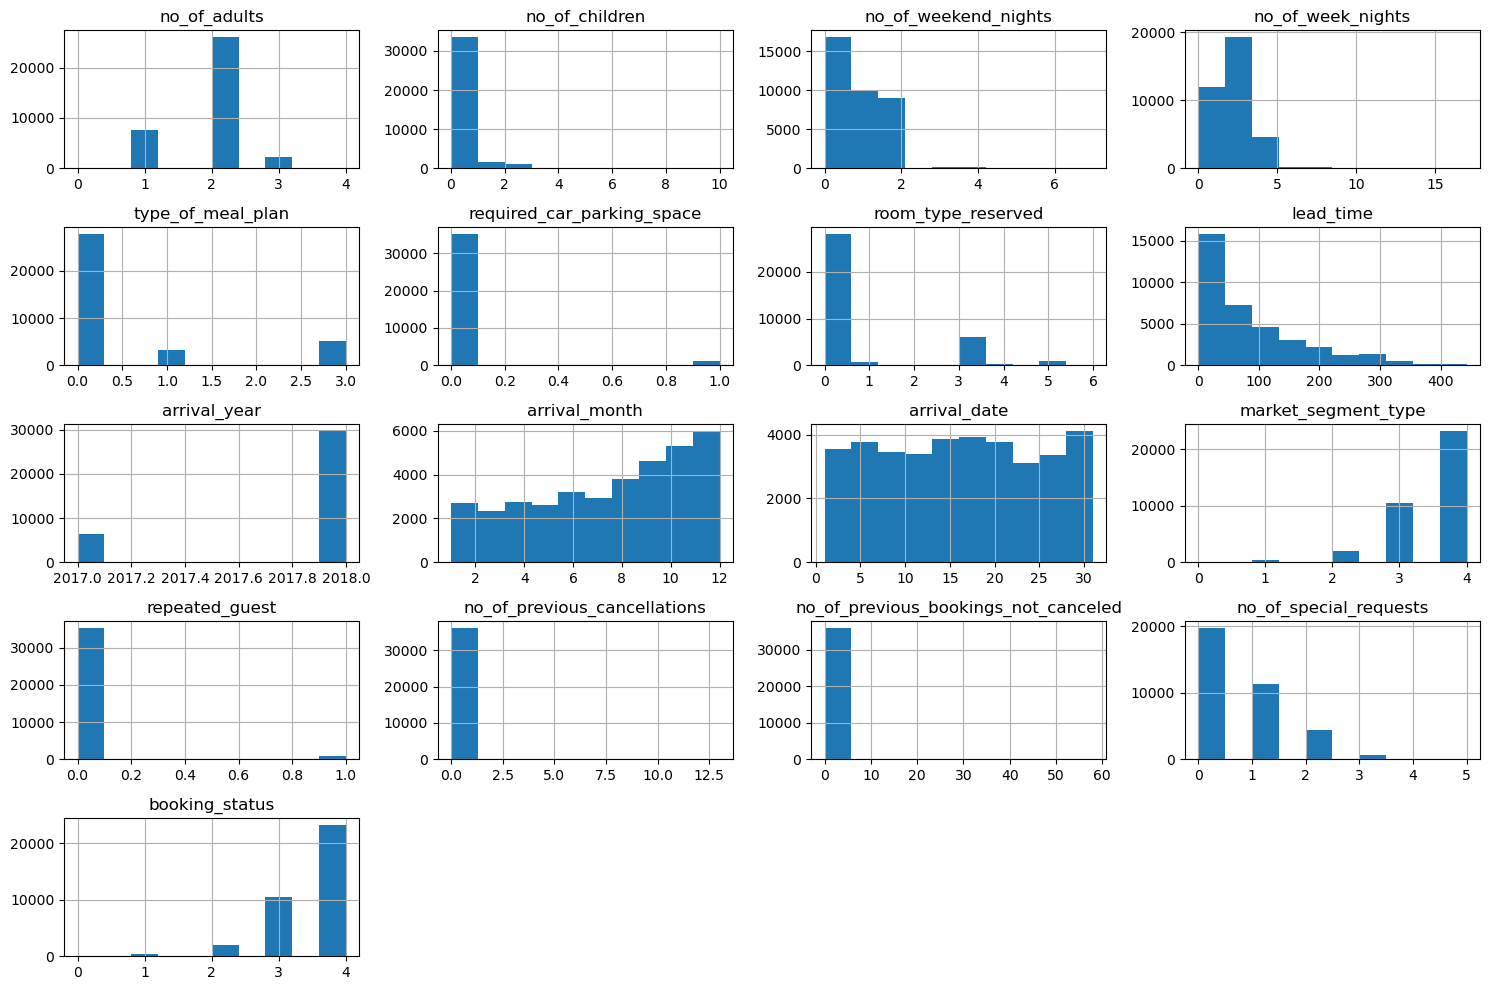

In [ ]:
features = df.drop(columns=['avg_price_per_room'])
features.hist(figsize=(15,10))
plt.tight_layout()
plt.show() 



In [ ]:
# 데이터 분리
# 독립변수(x), 종속변수(y) 분리 
x = df.drop(['avg_price_per_room'], axis=1)
y = df['avg_price_per_room']



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42) 
print(f"Train size: {x_train.shape}")
print(f"Test size: {x_test.shape}")


Train size: (21765, 17)
Test size: (14510, 17)


In [ ]:
# 랜덤 포레스트 모델 훈련
rf = DecisionTreeRegressor()
rf.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# 예측 test data
y_pred = rf.predict(x_test)

In [ ]:
# 모델평가 
print("Accuracy score:", r2_score(y_test, y_pred))

Accuracy score: 0.6727622689426878


In [ ]:
importances = rf.feature_importances_ 
#학습 후 중요도 추출 

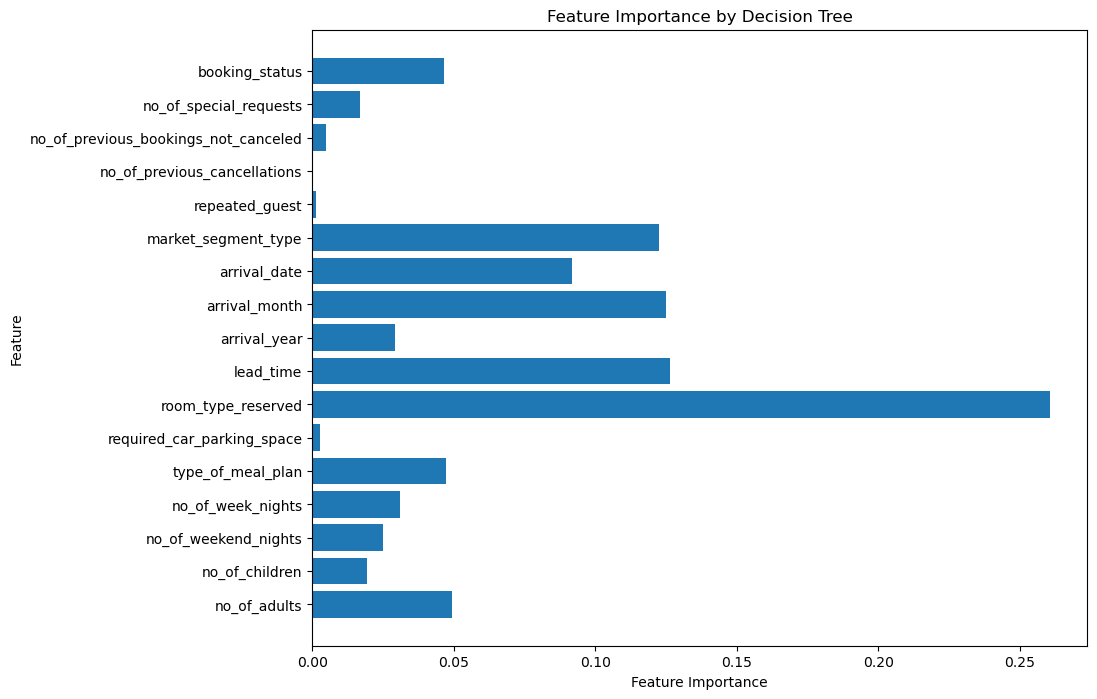

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(x.columns, importances) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Decision Tree')

plt.show()
# 중요도 시각화 
# 속성을 사용하면 각 특성이 예측에 얼마나 기여했는지 파악할 수 있다.

In [ ]:
# 총 숙박일수 계산 
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']


In [ ]:
# 예약 날짜, 도착 날짜 사이의 시간을 해당 월의 총일수에 대한 백분율
df['lead_time_percent_of_month'] = (df['lead_time'] / 30).clip(upper=1) * 100

In [ ]:
# 주어진 날짜에 대해 그 날짜가 속한 달의 몇 번쨰 주인지 계산하는 함수 
def week_of_month(day):
    return(day-1) // 7 + 1

In [ ]:
X_new = df.drop(['avg_price_per_room'], axis=1)
# avg_price_per_room 열 drop 
# 나머지 변수들은 x_new에 새로운 데이터프레임 생성 

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.4, random_state=42)
print(f"Train size: {X_train_new.shape}")
print(f"Test size: {X_test_new.shape}")
# x_new 모델 예측 
# 데이터 크기 추출  

Train size: (21765, 19)
Test size: (14510, 19)


In [ ]:
rf_new = DecisionTreeRegressor()
rf_new.fit(X_train_new, y_train_new)

DecisionTreeRegressor()

In [ ]:
y_pred_new = rf_new.predict(X_test_new) 

In [ ]:
print("Accuracy score: ", r2_score(y_test, y_pred_new)) 
# 종속 변수의 분산의 비율 

Accuracy score:  0.6703300006818473


In [ ]:
importances_new = rf_new.feature_importances_

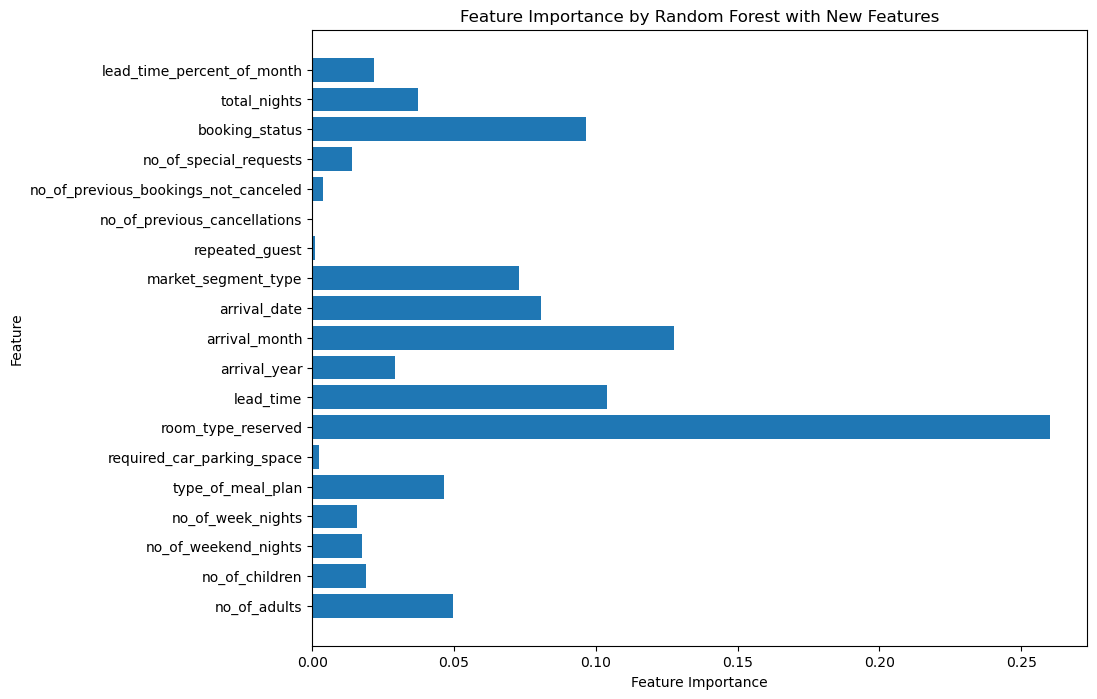

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(X_new.columns, importances_new)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Random Forest with New Features')
plt.show()
# 성능평가가 된 중요도 시각화 
# importances